In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("template.png",cv2.IMREAD_COLOR)

In [3]:
import numpy as np

In [4]:
arr = np.array(img)

In [5]:
np.shape(arr)

(3183, 4201, 3)

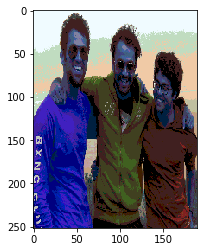

In [6]:
# reshape to get the smaller workable image element
h,w,d = img.shape
reshapeImg = cv2.resize(img, (int(h*0.06),int(w*0.06)))
plt.imshow(reshapeImg)
hi,wi,di = reshapeImg.shape

# reshape to get the structuring template - This can be a different image (maybe! FIXME : Test this)
template = cv2.resize(img, (int(h*0.01),int(w*0.01)))
ht,wt,dt = template.shape

In [7]:
# change the colormap f-up
#plt.imsave("boo",reshapeImg)

In [8]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
reshapeImg.shape

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


(252, 190, 3)

In [10]:
reshapeImg[0,0,:]

array([240, 251, 255], dtype=uint8)

In [11]:
plt.imshow(colorMe(template,255,251,240))

NameError: name 'colorMe' is not defined

In [12]:
# Lets take R,G,B
def colorMe(template,r=127,g=127,b=127):
    h,w,d = template.shape
    reverseR = np.zeros((h,w,d),dtype=int)
    apparentB = template[:,:,0]
    apparentG = template[:,:,1]
    apparentR = template[:,:,2]
    if r > g and r > b:
        reverseR[:,:,0] = np.multiply(apparentR,1+(float(r)/127))
        reverseR[:,:,1] = np.multiply(apparentG,1-(float(g)/255))
        reverseR[:,:,2] = np.multiply(apparentB,1-(float(b)/255))
    else:
        if g > b and g > r:
            reverseR[:,:,0] = np.multiply(apparentR,1-(float(r)/255))
            reverseR[:,:,1] = np.multiply(apparentG,1+(float(g)/127))
            reverseR[:,:,2] = np.multiply(apparentB,1-(float(b)/255))
        else:
            reverseR[:,:,0] = np.multiply(apparentR,1-(float(r)/255))
            reverseR[:,:,1] = np.multiply(apparentG,1-(float(g)/255))
            reverseR[:,:,2] = np.multiply(apparentB,1+(float(b)/127))
    return reverseR

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


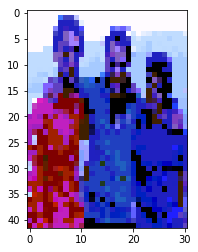

In [13]:
plt.imshow(colorMe(template,0,0,255))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


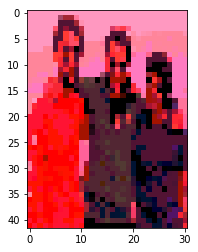

In [14]:
plt.imshow(colorMe(template,200,100,50))

In [15]:
# Lets do the damn conversion
newImg = np.ndarray((hi*ht,wi*wt,3))
print(newImg.shape)
rInd = 0
cInd = 0
for row in range(hi):
    for col in range(wi):
        b,g,r = reshapeImg[row,col,:]
        currImg = colorMe(template,r,g,b)
        newImg[ht*row:ht*(row+1),wt*col:wt*(col+1),:] = currImg


(10584, 5890, 3)


In [16]:
#plt.imshow(newImg)

In [17]:
plt.imsave("NewImg",newImg)

In [18]:
np.min(newImg)

0.0